In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Project Summary : Business Case Analysis:
## Data Requirement: 
   - The data is given in an excel file and is about a data analytics firm, whose employee performance indexes are coming down, and customer satisfaction levels are declining. 
   - To be able to take any remedial measures, the factors affecting the poor performance and to be able to predict if a employee is poorly performing or not based on the attributes, is to be determined.
   - Seeking the help of ML, we are asked to develop a model that analyses the current employees and figures out the causes/factors of poorer performances. Additionally,the model can be designed to predict if a employee is underperforming or not and the rating of performance.
   - Insights expected from the project are as given:
        1. Department wise performances
        2. Top 3 Important Factors effecting employee performance
        3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
        4. Recommendations to improve the employee performance based on insights from analysis.

## Aim: Exploratory Data Analysis

In [2]:
#Load data from excel
data = pd.read_excel('/Users/subbalakshmivedam/Desktop/datascience projects/IABAC/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

## Feature details:
1. EmpNumber: Unique ID of each employee. Doesn't hold significance in determining the rating.
2. Age
3. Gender
4. EducationBackground
5. MaritalStatus
6. EmpDepartment: The department to which employee belongs to.
7. EmpJobRole: The role of employee in the department.
8. BusinessTravelFrequency: frequent, occasional or rare traveling
9. DistanceFromHome: Assumed to be in miles.
10. EmpEducationLevel: Rated between 1-5
11. EmpEnvironmentSatisfaction: Rated 1-4 
12. EmpHourlyRate: Assumed to be in USD
13. EmpJobInvolvement: Rated 1-4
14. EmpJobLevel: Rated 1-5
15. EmpJobSatisfaction: Rated 1-4	
16. NumCompaniesWorked: Rated 0-9
17. OverTime: Whether employee worked overtime (yes/no)
18. EmpLastSalaryHikePercent: Varies from 11-25%
19. EmpRelationshipSatisfaction: Rated 1-4
20. TotalWorkExperienceInYears: Varies from 0-40
21. TrainingTimesLastYear: No. of times he was put into some training program, last year: Varies 0-6
22. EmpWorkLifeBalance: Rated between 1-4
23. ExperienceYearsAtThisCompany: Varies 0-40
24. ExperienceYearsInCurrentRole: Varies from 0-18
25. YearsSinceLastPromotion: Varies from 0-15.
26. YearsWithCurrManager: Varies from 0-17
27. Attrition: Whether the employee left or not
28. PerformanceRating: Rated 2-4

## Exploratory Data Analysis (EDA): 
- As part of EDA, we'll do both univariate and bivariate analysis
- Univariate analysis gives us an idea of spread of values of the feature
- Bivariate analysis, along with many other insights, provide us how data is spread or got influenced in relation with target variable.
- We'll do count plots as Since from description  and null check, the data has no null values, or basically large outliers. Hence we do not need to understand their distribution.


In [3]:
#Getting list of columns
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [4]:
for i in data.columns[1:]:
    print('Column name: ',i,'\nNo. of unique values: ',len(data[i].unique()))
    print('Value counts of {} are: \n'.format(i),data[i].value_counts())

Column name:  Age 
No. of unique values:  43
Value counts of Age are: 
 34    71
35    64
36    60
31    57
29    51
38    48
32    46
40    46
33    46
27    43
30    42
37    41
28    39
45    36
42    36
26    33
41    32
39    31
44    30
50    28
43    26
46    24
25    24
49    21
24    20
47    20
55    17
54    16
48    16
52    15
53    15
22    15
51    14
56    11
21    11
58    11
23     9
19     8
18     8
20     6
59     6
57     4
60     3
Name: Age, dtype: int64
Column name:  Gender 
No. of unique values:  2
Value counts of Gender are: 
 Male      725
Female    475
Name: Gender, dtype: int64
Column name:  EducationBackground 
No. of unique values:  6
Value counts of EducationBackground are: 
 Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64
Column name:  MaritalStatus 
No. of unique values:  3
Value counts of MaritalStatus are: 
 Married

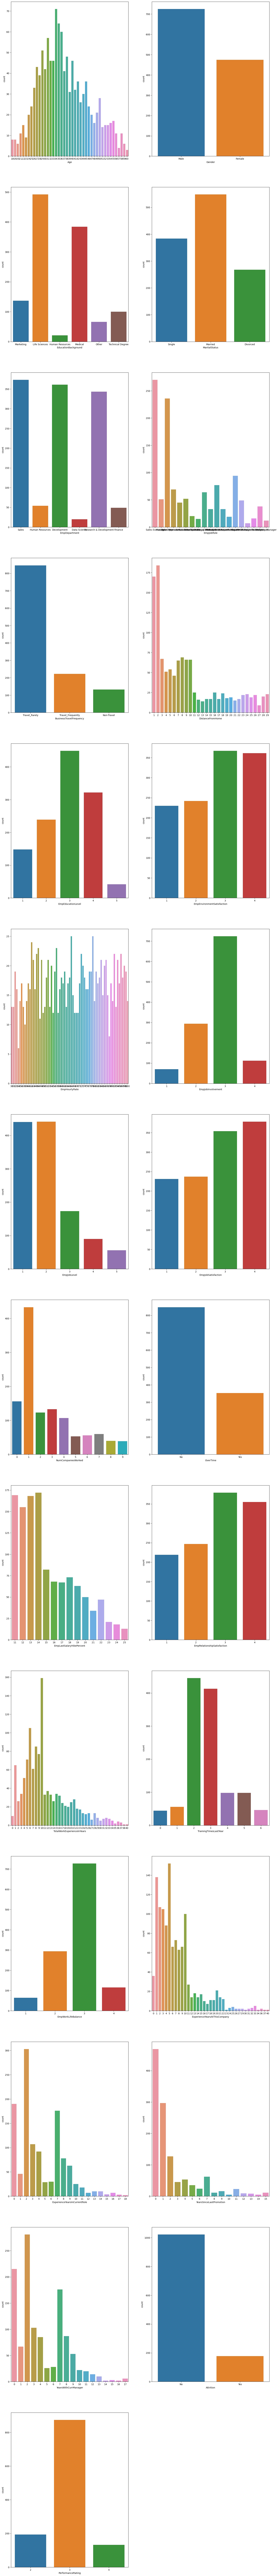

In [5]:
#Since most variables have limited spread, its easy to have count plots of all data.
#Code to plot countplot all data features
plt.figure(figsize=(20,200))
plt_num = 1
for i in data.columns[1:]:
    plt.subplot(14,2,plt_num)
    sns.countplot(data[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt_num+=1

<AxesSubplot:xlabel='EmpJobRole', ylabel='count'>

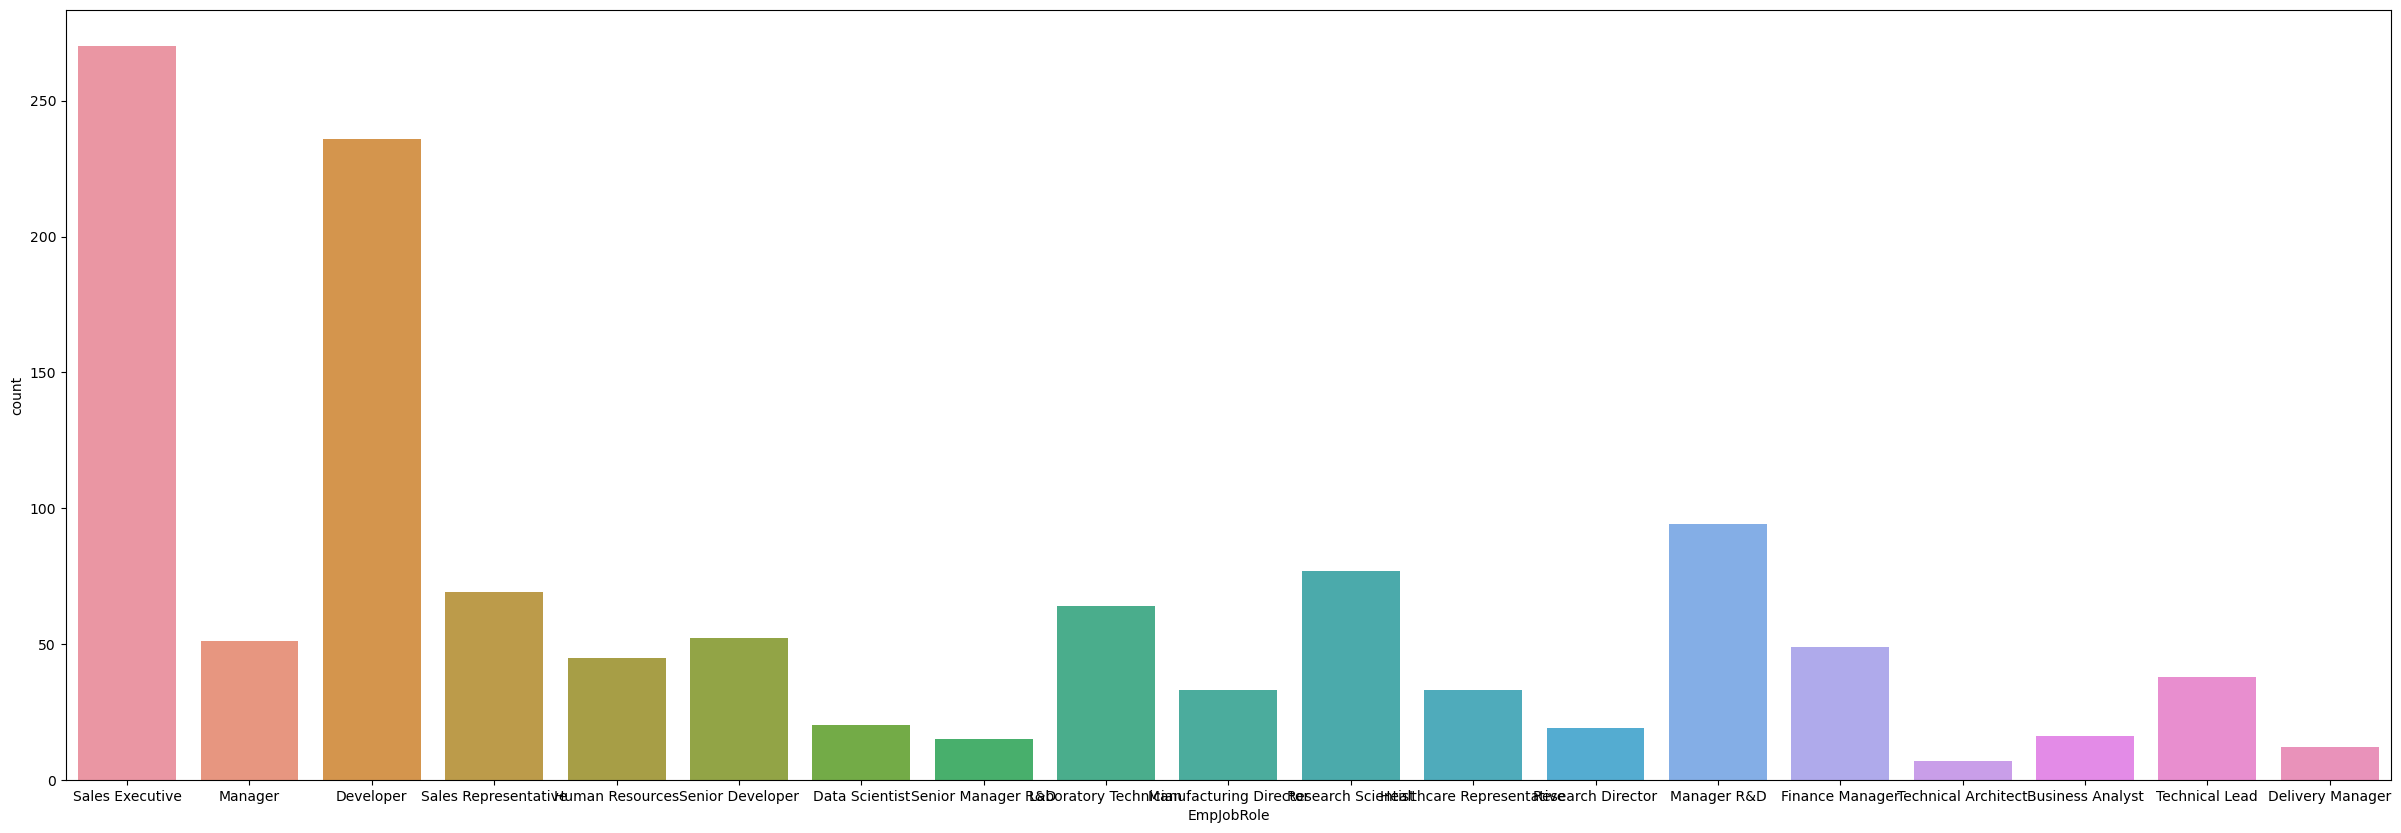

In [6]:
#Plotting empjob role separately as its not interpretable in the lot
plt.figure(figsize=(30,10))
sns.countplot(data.EmpJobRole)

In [7]:
data.EmpHourlyRate.mean()

65.98166666666667

In [8]:
len(data.loc[data.TotalWorkExperienceInYears<10])

585

In [9]:
len(data.loc[data.ExperienceYearsAtThisCompany<22])

1158

In [10]:
#Bivariate analysis 
#Since the spread is limited, countplot with a hue will give us analysis of all featues with respect to target
plt.figure(figsize=(20,400))
plt_num = 1
for i in data.columns[1:(len(data.columns)-1)]:
    plt.subplot(26,1,plt_num)
    sns.countplot(data[i],hue=data.PerformanceRating)
    plt.xlabel(i)
    plt.ylabel('count')
    plt_num+=1

In [11]:
print(data.loc[data.PerformanceRating==2,'EmpHourlyRate'].mean(),data.loc[data.PerformanceRating==3,'EmpHourlyRate'].mean(),data.loc[data.PerformanceRating==4,'EmpHourlyRate'].mean())

68.21649484536083 65.60983981693364 65.1590909090909


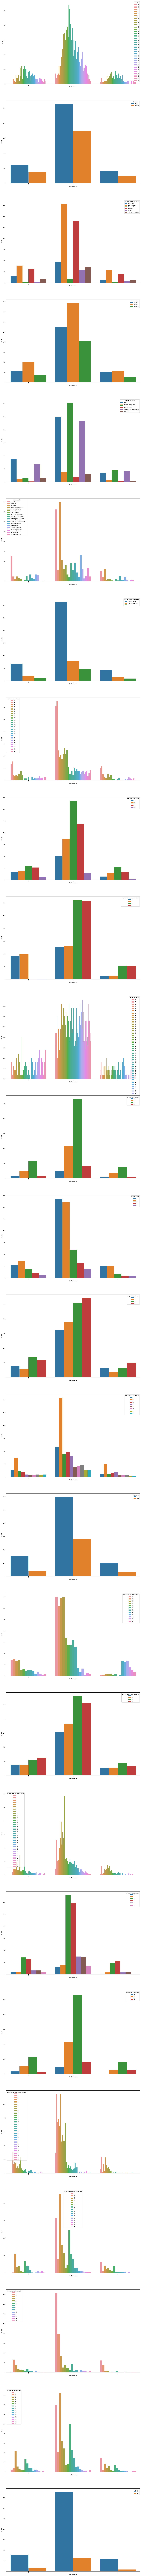

In [12]:
#Bivariate analysis 
plt.figure(figsize=(20,400))
plt_num = 1
for i in data.columns[1:(len(data.columns)-1)]:
    plt.subplot(27,1,plt_num)
    sns.countplot(data.PerformanceRating,hue=data[i])
    plt.xlabel('Performance')
    plt.ylabel('count')
    plt_num+=1

## Observations from univariate and bivariate analysis:
- The performances have been rated as 2,3,4. We shall call the ones with 2 as under performers, 3 as average performers and 4 as over performers or better performers.
- About 10% of employees are aged 34-36. 50% of employees are aged from 30-43, though the youngest employee is aged about 18 years and the oldest 60 years.
- However, there are no employees with performance rating of 2 are in the age group of under 21 or above 59, and the distribution shows that the newly joined employees or the most senior ones are performing well.
- Younger people relatively have higher proportion of underperformers too, while with age, the proportion of better performers have increased.
- There are more male employees than female employees. Male employees are 50% more than female employees, and gender doesn't seem to affect the performmances.
- Most employees (about 40%) are from Life sciences, while about 25-30% are from Medical background. Rest all are from either marketing or technical degree. Very few (2%) are form Human resources. The remaining (about 5%) employee's background education is not known. And in that unknown section, there are relatively higher proportion of high performances.
- About 45% of employees are married, while 20% of divorced. About 1/3rd of employees are single.
- More number of underperformers are found in married employees. More number of super performers are found in single employees. Marriage, hence is observed to slightly reduce the performance of employees. 
- About 90% of employees work in Sales or Development or Research and Development. We only have about 10% people in total working in Human Resources, Data Science and Fianance Department
- Employees from Development department and data science department have very less number of underperformers 
- About 23% employees work as Sales Executive, 20% work as Developer. Less number of employees are in the role of Senior manager, Data Scientist, Research Director, Delivery Manager and Business Analyst. Least number of employees work as Technical Architect.
- Higher proportion of underperformers can be seen in sales executive role. Research scientist role has relatively higher performance of best performers.
- 70% of employeees travel rarely. 10-12% of employees do not require travel at all. Rest, travel frequently.
- Higher proportion of average performers are found in those who travel rarely, than who completely do not travel or travel frequently. Underperformers are also seen more in those rarely traveling employees.
- 15% of employees stay within 2miles distance from office. 12% of employees stay within a mile from office. About 60-70% employees in total, stay within 10 miles from office. Remaining stay at longer distances, the longest being 29km.
- As far as the rating of employee's educational level is considered, most (>30%) have been rated at 3, followed by rating 4 and then 2. About 12% are rated at 1, and the least count (about 4%) are rated at 5.
- Average performers are higher at education level of 3. Lower and higher education level employees have relatively larger share of poor as well as better performing employees.
- As far as employee's environment satisfaction is considered, more than 60% have higher rating of 3 and 4. The remaining seemingly gave a rating of either 1 or 2
- Employees with higher job environment satisfaction have least under perfomers and vice-versa. 
- The employee hourly wage rate varies from 30-100, with a mean of 66 USD
- Higher proportion of underperformances are found in those whose hourly wage rate is 45,52,87,99. The mean hourly wage of underperforming employees is 68USD. The mean hourly wage of average performing and better performing employees is 65 USD.
- As far as the rating of Employee job involvement is considered, About 60 have rating of 3 followed by rating 2. Very less people (15%) have rating of 1 and 4 
- Most of the employees (a total of 75%) are at a job level of 1 or 2. Remaining are at job levels of 3 and 4, and the least belonged to job level of 5. 
- Speaking about employee job satisfaction, about 60% have given a rating of 4 or 3, while remaining  have rated it 1 or 2. 
- There are very less proportion of underperformers in those who have job satisfaction of 4, and accordingly there are higher number of best performers also. 
- About 35% of employeees have worked in a company before. About 12% of people haven't worked anywhere before. This is their first job. Remaining have worked in 2-9 companies before)
- Those who haven't worked anywhere else, showed more of average performance. There is higher proportion of better performers in those who have worked in a company before.
- Over two-thirds of employees do not work overtime. There is relatively higher proportion of under performing employees in those who do not work over time. 
- The last salary hike have been between 11-14% for over 50% employees. Only 5% of employees have had 22-25% of wage/salary hike. The remaining employees have had 15-22% of salary hike
- The employees that had 20-25% of salary hike, had very high proportion of better performers. Compartively, in this range, the average and under performers are also very less. Most of the employees in 11-19% salary hike, had larger proportion of average performers and a good share of underperformers. There are very less proportion of better performers in this segment of salary hike. This is another feature that is directly affecting the performance rating.
- The relationship satisfaction for employee with the company, rated on scale 1-4, had most (about two-thirds) voting 3 or 4. The remaining people either rated it as 1 or 2.
- There are higher proportion of average performers and underperformers in those with relationship rating of 3. 
- About 13% employees had work experience of 10 years, 7% had 6 years of experience. Overall, the total work experience of employees varied from 0-40 years, with a mean experience of 11 years. However, about 50% of employees have work experience equal to or less than 10 years.
- There are bigger share of better performers in employees whose experience is within 10 years. 
- About 75% of employees received 2-3 trainings last year. 4% of employees didn't recieve any trainings, and about 6% received one training. About 15% of employees received 4-6 traings in the previous year.
- Higher proportion of better performers is seen in those who had more trainings.
- On a scale of 1-4, more than 50% employees rated work life balance at 3, about 10% rated it at 4. About 6% rated it as 1, and the remaining rated it as 2.
- There are better performers in those who rated worklife balance at 4
- The employees experience at this company varied from 0-40 years. Most of employees (around 85%) had 0-11 years experience in this company. About 12% had 11-22 years of experience. Only 3% had experience of more than 22 years.
- More number of better performers have experience of within 8 years in this company. Relatively, in those whose experience in this company is larger than 8 years, the proportion of under performers is high.
- More number of employees (~37%) had either 2 or 7 years experience in current role. About 15% are new to their roles. Very less people (around 5%) have been in the role for more than 12 years. Rest all were in the role for 1-11 years. The maximum years an employee retained in the current role is 18 years.
- There are relatively higher number of better performers in those who are new to the job role. As it goes beyond 2 years, the proportion of under and average performers is high. In other words, the number of better performers is high in the initial years of employee in the job role. 
- Most employees in our data, seemingly are regularly promoted. About 37% had their last promotion within an year and 25% had it an year ago. 10% had promotion 2 years ago. The remaining had their last promotion in the last 3-15 years. There are very less number of people that were stagnant for more than 8 years.
- There are higher proportion of better performers in those that have been promoted recently. 
- Most people (about 30%) have been working under the same manager for less than 2 years. Either their managers changed after 4 years or continued and changed after 9 years, as evident from sudden decline of count of employees working with same manager after 4 years and after 9 years. About 15% had the same manager from 7 years.
- The proportion of better performers is high in those who have been with the same manager since less than an year. 
- 85% of employees have not left the company. 15% of employees are no more working with the company
- There is a relatively higher proportion better performers in those who retained the company. 
- About 70% of employees have been given a 3 rating in performance. ~18% of employees are given 2, while the remaining 12% employees are given a rating of 4. There are no one with rating 1. 

## TASK 1: Department wise performances

<AxesSubplot:xlabel='EmpDepartment', ylabel='count'>

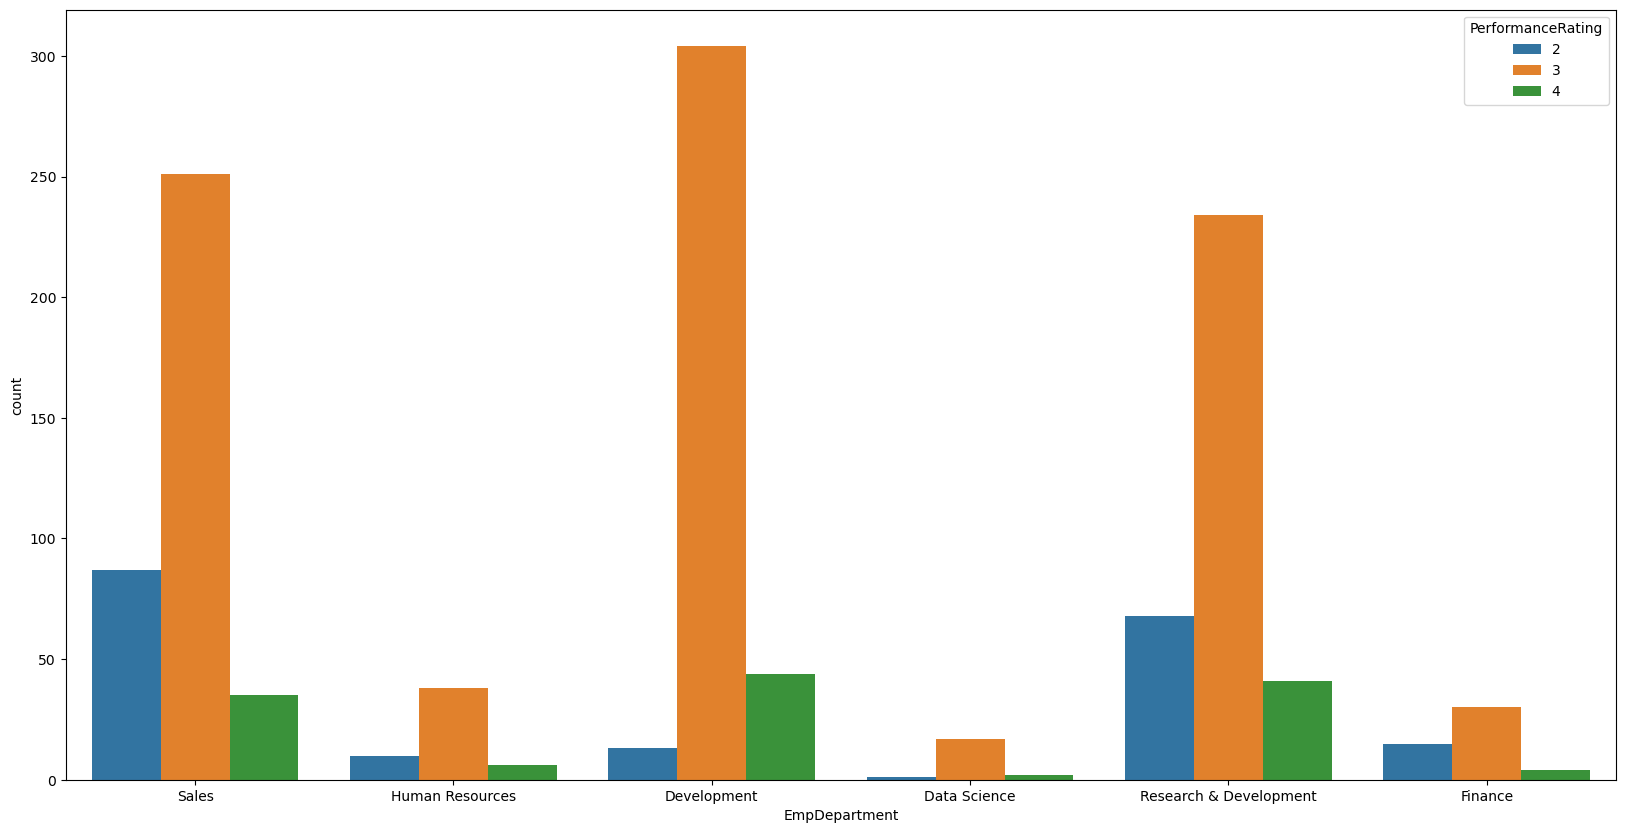

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data.EmpDepartment, hue=data.PerformanceRating)

In [14]:
data.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

Sales 
Rating	Count
2     87
3    251
4     35
Name: PerformanceRating, dtype: int64
Human Resources 
Rating	Count
2    10
3    38
4     6
Name: PerformanceRating, dtype: int64
Development 
Rating	Count
2     13
3    304
4     44
Name: PerformanceRating, dtype: int64
Data Science 
Rating	Count
2     1
3    17
4     2
Name: PerformanceRating, dtype: int64
Research & Development 
Rating	Count
2     68
3    234
4     41
Name: PerformanceRating, dtype: int64
Finance 
Rating	Count
2    15
3    30
4     4
Name: PerformanceRating, dtype: int64


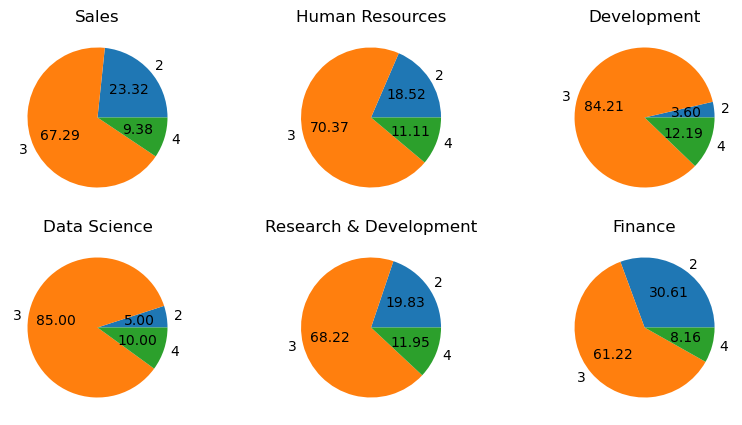

In [15]:
plt.figure(figsize=(10,5))
plt_num = 1
for i in data.EmpDepartment.unique():
    print(i,'\nRating\tCount')
    print(data.loc[data.EmpDepartment == i,'PerformanceRating'].value_counts().sort_index())
    plt.subplot(2,3,plt_num)
    plt.pie(data.loc[data.EmpDepartment == i,'PerformanceRating'].value_counts().sort_index(),labels=data.loc[data.EmpDepartment == i,'PerformanceRating'].value_counts().sort_index().index,autopct='%.2f')
    plt.title(i)
    plt_num+=1

## Task1: Department wise performances
- From the pie charts and data presented above, it is evident that, development department and data science department perform similar.
    - 84-85% of employees have a performance rating of 3, which is average. 10-12% of employees are high performers, with an overall performance rating of 4. 3.5-5% of employees are underperformers, going by their rating of 2.
- Human Resources and Research & Development departments are similar. 
    - About 68-70% of employees in these departments have an overall performance rating of 3, About 11-12% of them have a rating of 4. About 18.5-20% of them have a rating of 2, which is least performance.
- Sales department has 67% of employees rated at 3 (average), 23% rated at 2 (under performance) and only 9.4% rated at 4 (better performance).
- Finance department has 61% of average performers with rating of 3, 30.6% of employees with rating of 2, and 8% of employees with a rating of 4.
- Concluding, 
  - Finance department has most underperformers (rating 2), and least proportion of best performers(rating 4).
  - All other departments have 9.4-12% of best performers (rating 4).
  - However Development and data science have least number of underperformers with rating 2 (a proportion of only 3.6-5%)
  - Sales, HR and R&D have 18.5-23.3% of under performers (rating 2)

## Task 2: Top 3 Important Factors effecting employee performance

### Insights and Conclusions on factors affecting employee performance from EDA:
- Younger aged employees or the most aged ones are performing well. Younger employees have higher proportion of either under or better performers than average performers. This can be attributed to age related aggression. As age increases, while the number of better performers have increased (at a senior level), average performers have been more in number. This seems to be the effect of midlife crisis (more responsibilities on personal front, as well as work front)
- Employees who had better job environment satisfaction and job satisfaction had higher proportion of better performers. So, in other words, better environment, and job role, can be a factor that affects performance.
- Those who haven't worked in any company before had higher proportion of average performers, while those who have worked in a company before had higher proportion of better performers. Again, the performance is more of an average in those who have been hopping across companies.
- Higher salary hike employees have higher proportion of better performers.
- Those who have experience within 10 years, have higher proportion of better performers. 
- Those who have been promoted newly, and have been for less than an year in the current job role or under current manager have a higher proportion of better performers.
- We may attribute that higher performances could be related to the enthusiasm of promotion or newer challenges that the new job role or new manager offers. As the number of years pass, time induced or work induced monotony could have been affecting the performance.
### Therefore we could conclude that, job satisfaction and work environment satisfaction, salary hike percentage, time induced or work induced monotony (increased years in same job role or under same manager) are the top factors that affect employee performance rating. Other factors like experience and age also have a significant impact. 

In [16]:
#Dropping emp id as it is not in anyway a relevant feature to affect the employee performance.
data.drop('EmpNumber',axis=1,inplace=True)

### Encoding the categorical variables, to be able to check correlation and heat maps to filter features.

In [17]:
#Printing unique values of object columns
for i in ['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition']:
    print(i,': ',data[i].unique())

Gender :  ['Male' 'Female']
EducationBackground :  ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus :  ['Single' 'Married' 'Divorced']
EmpDepartment :  ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole :  ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime :  ['No' 'Yes']
Attrition :  ['No' 'Yes']


In [18]:
#Gender column we'll do onehot encoding, since gender values are not ordinal
data['Male'] = pd.get_dummies(data['Gender'])['Male']
data['Female'] = pd.get_dummies(data['Gender'])['Female']
data.drop('Gender',axis=1,inplace=True)

In [19]:
#Label encoding or manual encoding as applicable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.MaritalStatus=le.fit_transform(data.MaritalStatus)
data.EducationBackground = le.fit_transform(data.EducationBackground)
data.EmpJobRole = le.fit_transform(data.EmpJobRole)
data.EmpDepartment = le.fit_transform(data.EmpDepartment)
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
data.OverTime = data.OverTime.map({'No':0,'Yes':1})
data.Attrition = data.Attrition.map({'No':0,'Yes':1})

In [20]:
#Checking if all datatypes are numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   EducationBackground           1200 non-null   int64
 2   MaritalStatus                 1200 non-null   int64
 3   EmpDepartment                 1200 non-null   int64
 4   EmpJobRole                    1200 non-null   int64
 5   BusinessTravelFrequency       1200 non-null   int64
 6   DistanceFromHome              1200 non-null   int64
 7   EmpEducationLevel             1200 non-null   int64
 8   EmpEnvironmentSatisfaction    1200 non-null   int64
 9   EmpHourlyRate                 1200 non-null   int64
 10  EmpJobInvolvement             1200 non-null   int64
 11  EmpJobLevel                   1200 non-null   int64
 12  EmpJobSatisfaction            1200 non-null   int64
 13  NumCompaniesWorked            120

In [21]:
#Now that all columns are numerical, we shall observe correlation.
data.corr()

Age  EducationBackground  MaritalStatus  \
Age                           1.000000            -0.055905      -0.098368   
EducationBackground          -0.055905             1.000000      -0.001097   
MaritalStatus                -0.098368            -0.001097       1.000000   
EmpDepartment                -0.000104            -0.026874       0.067272   
EmpJobRole                   -0.037665            -0.012325       0.038023   
BusinessTravelFrequency      -0.011196            -0.008458       0.026075   
DistanceFromHome              0.020937            -0.013919      -0.019148   
EmpEducationLevel             0.207313            -0.047978       0.026737   
EmpEnvironmentSatisfaction    0.013814             0.045028      -0.032467   
EmpHourlyRate                 0.062867            -0.030234      -0.013540   
EmpJobInvolvement             0.027216            -0.025505      -0.043355   
EmpJobLevel                   0.509139            -0.056338      -0.087359   
EmpJobSatisfaction           -0.002436            -0.030977       0.044593   
NumCompaniesWorked            0.284408            -0.032879      -0.030095   
OverTime                      0.051910             0.007046      -0.022833   
EmpLastSalaryHikePercent     -0.006105            -0.009788       0.010128   
EmpRelationshipSatisfaction   0.049749             0.005652       0.026410   
TotalWorkExperienceInYears    0.680886            -0.027929      -0.093537   
TrainingTimesLastYear        -0.016053             0.051596       0.026045   
EmpWorkLifeBalance           -0.019563             0.022890       0.014154   
ExperienceYearsAtThisCompany  0.318852            -0.009887      -0.075728   
ExperienceYearsInCurrentRole  0.217163            -0.003215      -0.076663   
YearsSinceLastPromotion       0.228199             0.014277      -0.052951   
YearsWithCurrManager          0.205098             0.002767      -0.061908   
Attrition                    -0.189317             0.027161       0.162969   
PerformanceRating            -0.040164             0.005607       0.024172   
Male                         -0.040107             0.009922      -0.042169   
Female                        0.040107            -0.009922       0.042169   

                              EmpDepartment  EmpJobRole  \
Age                               -0.000104   -0.037665   
EducationBackground               -0.026874   -0.012325   
MaritalStatus                      0.067272    0.038023   
EmpDepartment                      1.000000    0.568973   
EmpJobRole                         0.568973    1.000000   
BusinessTravelFrequency           -0.015846   -0.048414   
DistanceFromHome                   0.007707    0.022939   
EmpEducationLevel                  0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.019237    0.044612   
EmpHourlyRate                      0.003957   -0.016179   
EmpJobInvolvement                 -0.076988   -0.008034   
EmpJobLevel                        0.100526    0.004406   
EmpJobSatisfaction                 0.007150    0.032916   
NumCompaniesWorked                -0.033950   -0.009111   
OverTime                          -0.026841    0.015075   
EmpLastSalaryHikePercent          -0.012661    0.005735   
EmpRelationshipSatisfaction       -0.050286   -0.043067   
TotalWorkExperienceInYears         0.016065   -0.049529   
TrainingTimesLastYear              0.016438    0.004452   
EmpWorkLifeBalance                 0.068875   -0.007519   
ExperienceYearsAtThisCompany       0.047677   -0.009047   
ExperienceYearsInCurrentRole       0.069602    0.019383   
YearsSinceLastPromotion            0.052315    0.012190   
YearsWithCurrManager               0.033850   -0.004504   
Attrition                          0.048006    0.037508   
PerformanceRating                 -0.162615   -0.096209   
Male                              -0.010925    0.011332   
Female                             0.010925   -0.011332   

                              BusinessTravelFrequency  Dista

<AxesSubplot:>

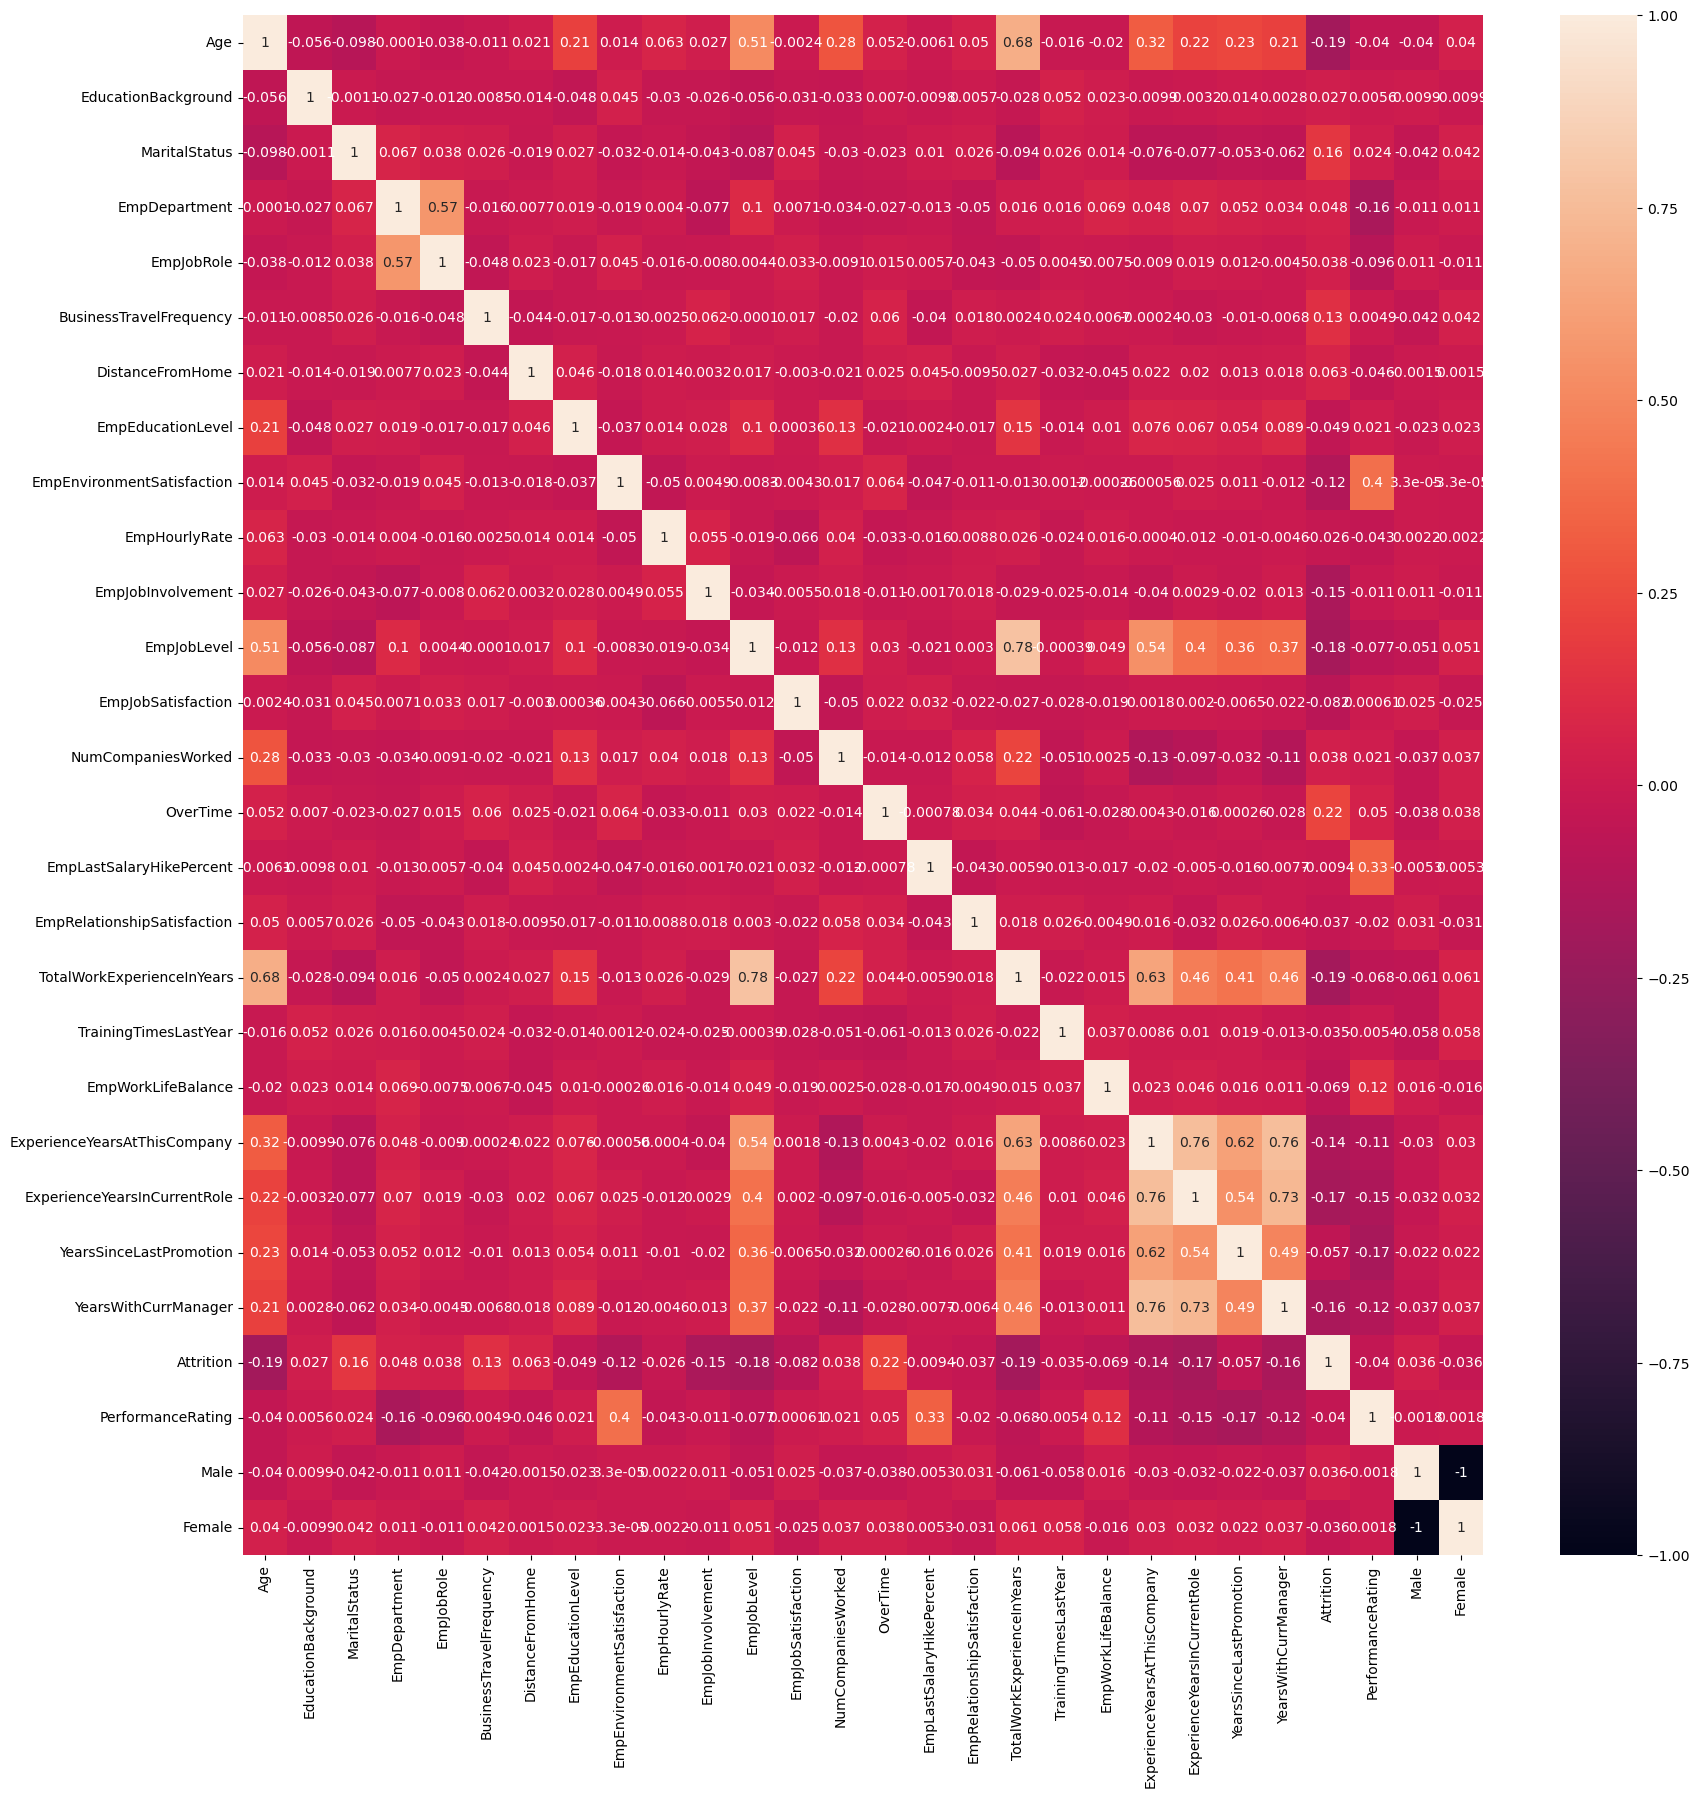

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

### Insights from correlation
- We'll set the correlation threshold to 0.6, so accordingly we may have to filter out features.
- Correlation between male and female features is accepted, as they were dummies created through onehot encoding
- There is higher amount of correlation between 'Total work experience in years', 'age', 'employee job level', 'experience years in this company'. We may filter out 'experience years at this company', 'age' and 'empjoblevel', as the model's usecase is to be used while hiring the employees (as per project scenario) and retain 'total experience in years', as that is a more relevant feature
- Lets observe the heat map now.

In [23]:
data.drop(['ExperienceYearsAtThisCompany','Age','EmpJobLevel'],axis=1,inplace=True)

<AxesSubplot:>

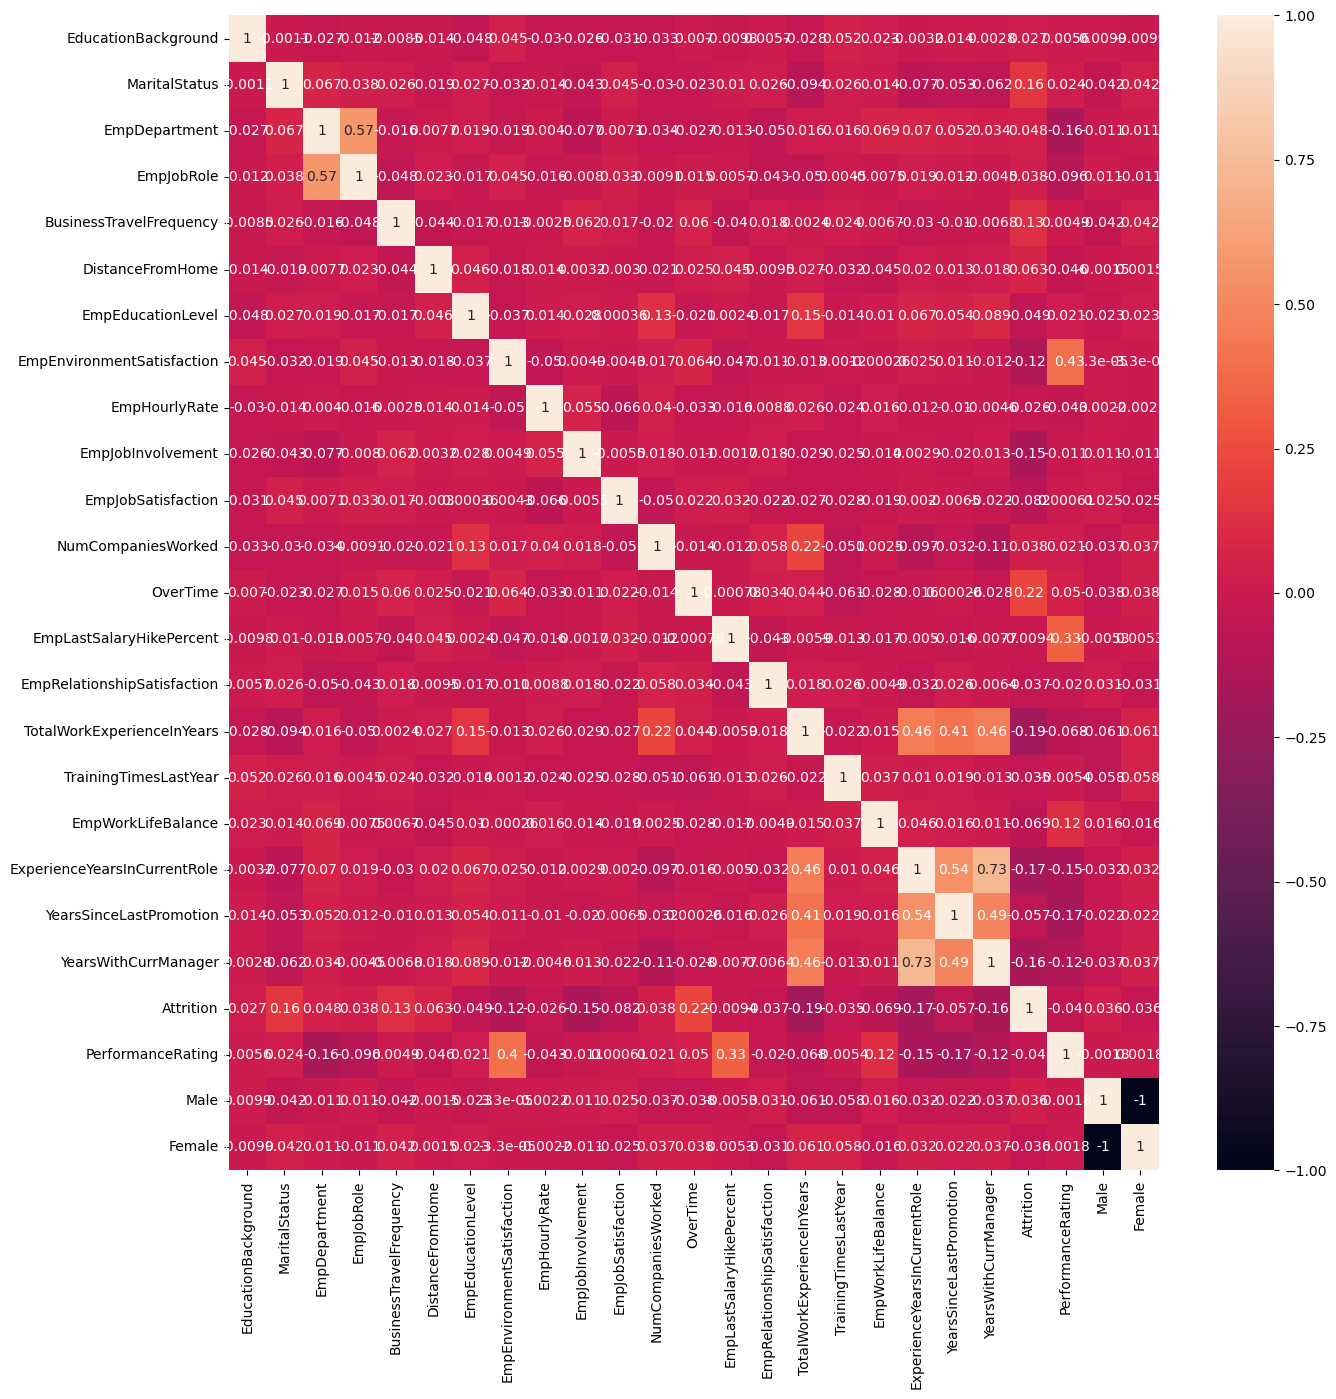

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

- experience years in current role and years with the current manager and years since last promotion are all highly correlated. So, experience years in the current role shall be considered and the other shall be taken off

In [25]:
data.drop('YearsWithCurrManager',axis=1,inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EducationBackground           1200 non-null   int64
 1   MaritalStatus                 1200 non-null   int64
 2   EmpDepartment                 1200 non-null   int64
 3   EmpJobRole                    1200 non-null   int64
 4   BusinessTravelFrequency       1200 non-null   int64
 5   DistanceFromHome              1200 non-null   int64
 6   EmpEducationLevel             1200 non-null   int64
 7   EmpEnvironmentSatisfaction    1200 non-null   int64
 8   EmpHourlyRate                 1200 non-null   int64
 9   EmpJobInvolvement             1200 non-null   int64
 10  EmpJobSatisfaction            1200 non-null   int64
 11  NumCompaniesWorked            1200 non-null   int64
 12  OverTime                      1200 non-null   int64
 13  EmpLastSalaryHikePercent      120

<AxesSubplot:>

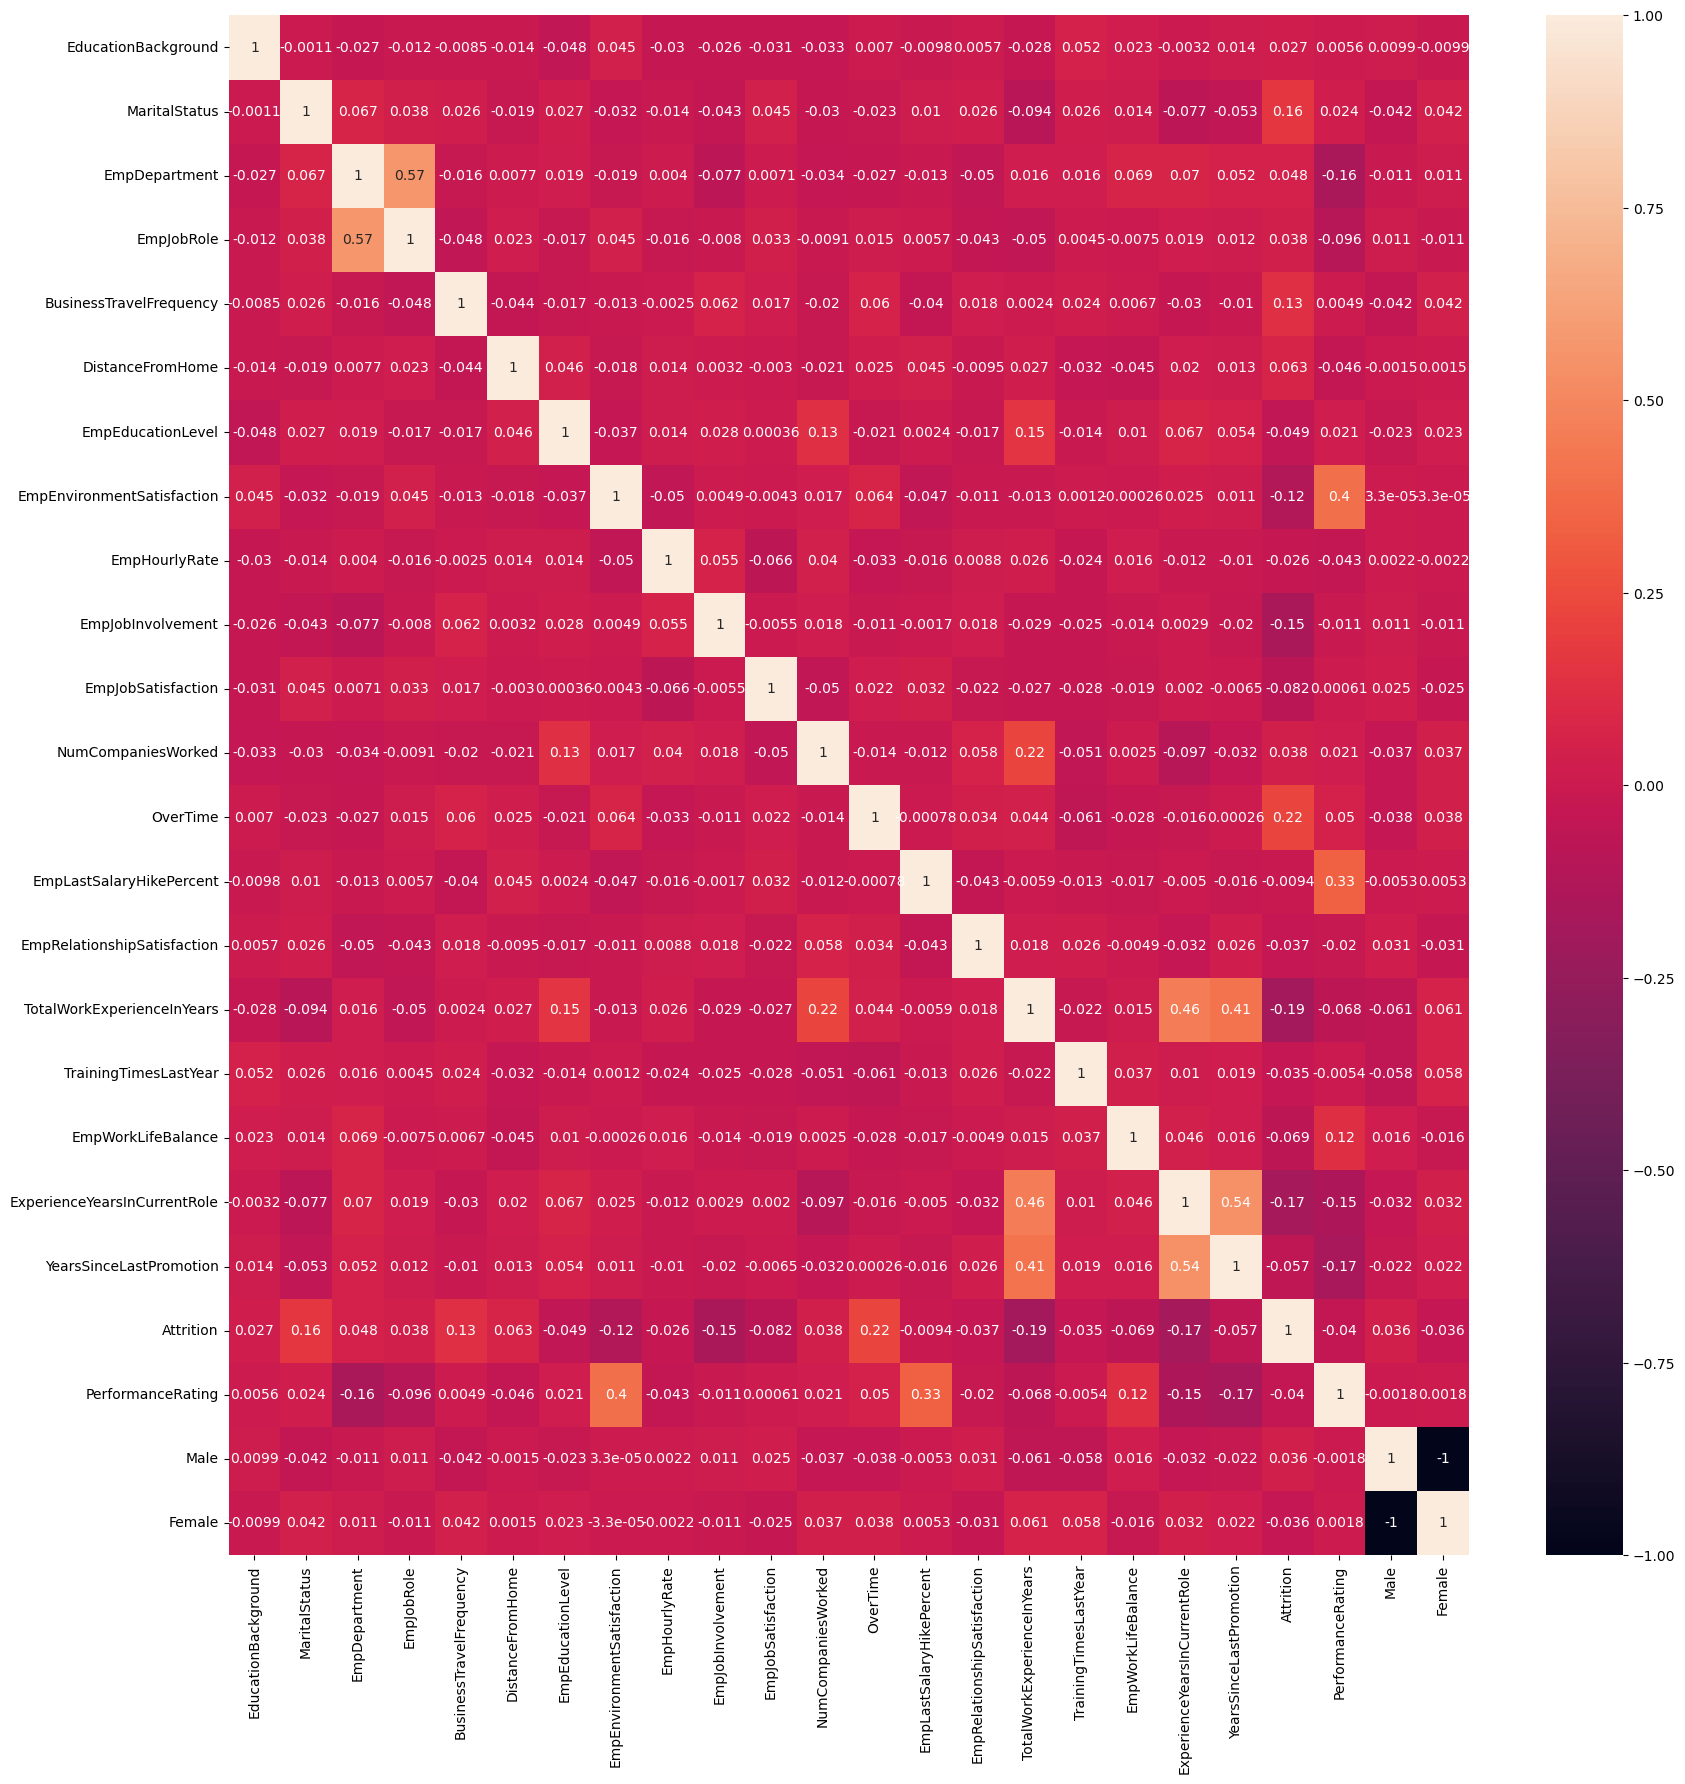

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## Conclusions:
- After filtering the high correlated features, we end up with the above correlation map, thats decent.
- We hence take these features alone and proceed to modeling.

In [32]:
data.to_excel('/Users/subbalakshmivedam/Desktop/datascience projects/IABAC/data/processed.xlsx')